# Wikipedia Notable Life Expectancies
# [Notebook 11: Data Pre-processing ](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_data_preproc_2022_10_06.ipynb)
### Context

The
### Objective

The
### Data Dictionary
- Feature: Description

### Importing Libraries

In [1]:
# To structure code automatically
%load_ext nb_black

# To import/export sqlite databases
import sqlite3 as sql

# To save/open python objects in pickle file
# import pickle

# To help with reading, cleaning, and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# randomized data splitting
from sklearn.model_selection import train_test_split

# building regression model
import statsmodels.api as sm

# check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# check linear regression assumptions
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pylab
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

# to compare fit between models
from scipy.stats.distributions import chi2

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
# To define the maximum number of rows to be displayed in a dataframe
pd.set_option("display.max_rows", 211)

# To set some dataframe visualization attributes
pd.set_option("max_colwidth", 150)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
# import warnings

# warnings.filterwarnings("ignore")

# To set some plot visualization attributes
sns.set_theme()
sns.set_palette(
    (
        "midnightblue",
        "goldenrod",
        "maroon",
        "darkolivegreen",
        "cadetblue",
        "tab:purple",
        "yellowgreen",
    )
)
plt.rc("font", size=12)
plt.rc("axes", titlesize=15)
plt.rc("axes", labelsize=14)
plt.rc("xtick", labelsize=13)
plt.rc("ytick", labelsize=13)
plt.rc("legend", fontsize=13)
plt.rc("legend", fontsize=14)
plt.rc("figure", titlesize=16)

# To play auditory cue when cell has executed, has warning, or has error and set chime theme
import chime

chime.theme("zelda")

<IPython.core.display.Javascript object>

## Data Overview

### [Reading](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_EDA.db), Sampling, and Checking Data Shape

In [2]:
# Reading the dataset
conn = sql.connect("wp_life_expect_EDA.db")
data = pd.read_sql("SELECT * FROM wp_life_expect_EDA", conn)

# Making a working copy
df = data.copy()

# Checking the shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

# Checking first 2 rows of the data
df.head(2)

There are 97549 rows and 25 columns.


,info,link,num_references,year,info_parenth,age,cause_of_death,place_1,place_2,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,num_categories,recip_num_references,region,prior_region,known_for
0,", 86, British dancer, ballet designer and director.",https://en.wikipedia.org/wiki/William_Chappell_(dancer),21,1994,None,86.000,None,United Kingdom of Great Britain and Northern Ireland,None,0,0,0,0,0,1,0,0,0,0,0,1,0.048,Europe,N/A,arts
1,", 68, Irish economist, writer, and academic.",https://en.wikipedia.org/wiki/Raymond_Crotty,12,1994,None,68.000,None,Ireland,None,0,0,0,1,0,1,0,0,1,0,0,3,0.083,Europe,N/A,three_to_five


<IPython.core.display.Javascript object>

In [3]:
# Checking last 2 rows of the data
df.tail(2)

,info,link,num_references,year,info_parenth,age,cause_of_death,place_1,place_2,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,num_categories,recip_num_references,region,prior_region,known_for
97547,", 50, Pakistani journalist and politician, MNA .",https://en.wikipedia.org/wiki/Aamir_Liaquat_Hussain,99,2022,"2002 2007, since 2018",50.000,None,Pakistan,None,0,0,0,0,0,1,0,0,1,0,0,2,0.010,Asia,N/A,two
97548,", 86, Chinese engineer, member of the Chinese Academy of Engineering.",https://en.wikipedia.org/wiki/Zou_Jing_(engineer),3,2022,None,86.000,None,"China, People's Republic of",None,1,0,0,0,0,0,0,0,0,0,0,1,0.333,Asia,N/A,sciences


<IPython.core.display.Javascript object>

In [4]:
# Checking a sample of the data
df.sample(5)

,info,link,num_references,year,info_parenth,age,cause_of_death,place_1,place_2,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,num_categories,recip_num_references,region,prior_region,known_for
73792,", 62, Portuguese singer, pulmonary fibrosis.",https://en.wikipedia.org/wiki/Dina_(singer),7,2019,None,62.000,pulmonary fibrosis,Portugal,None,0,0,0,0,0,1,0,0,0,0,0,1,0.143,Europe,N/A,arts
71049,", 86, Czech football player .",https://en.wikipedia.org/wiki/Tadeusz_Kraus,4,2018,"Sparta Prague, national team and manager Aris Limassol",86.000,None,Czech Republic,None,0,0,0,0,0,0,1,0,0,0,0,1,0.250,Europe,N/A,sports
47760,", 79, American Emmy Award-winning producer, director , leukemia-induced pneumonia.",https://en.wikipedia.org/wiki/Nancy_Malone,7,2014,and actress,79.000,leukemia induced pneumonia,United States of America,None,0,0,0,0,0,1,0,0,0,0,0,1,0.143,North America,N/A,arts
44173,", 67, Canadian actress .",https://en.wikipedia.org/wiki/Haji_(actress),8,2013,,67.000,None,Canada,None,0,0,0,0,0,1,0,0,0,0,0,1,0.125,North America,N/A,arts
18382,", 89, American oil well fire-fighter.",https://en.wikipedia.org/wiki/Red_Adair,9,2004,None,89.000,None,United States of America,None,0,0,0,0,0,0,0,1,0,0,0,1,0.111,North America,N/A,law_enf_military_operator


<IPython.core.display.Javascript object>

### Checking Data Types and Null Values

In [5]:
# Checking data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97549 entries, 0 to 97548
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   info                       97549 non-null  object 
 1   link                       97549 non-null  object 
 2   num_references             97549 non-null  int64  
 3   year                       97549 non-null  int64  
 4   info_parenth               36536 non-null  object 
 5   age                        97549 non-null  float64
 6   cause_of_death             33179 non-null  object 
 7   place_1                    97406 non-null  object 
 8   place_2                    5442 non-null   object 
 9   sciences                   97549 non-null  int64  
 10  social                     97549 non-null  int64  
 11  spiritual                  97549 non-null  int64  
 12  academia_humanities        97549 non-null  int64  
 13  business_farming           97549 non-null  int

<IPython.core.display.Javascript object>

#### Observations:
- There are 97549 rows and 25 columns.
- With our dataset loaded, we begin data pre-processing.
- We will need to typecast our categorical columns again, after dropping unnecessary columns.

## Data Pre-processing
- At the outset, we can drop the following columns:
    - `num_references`
    - `cause_of_death`
    - `place_1`
    - `place_2`
- We can also drop the entries with `event_record_other` as their sole `known_for` category.
- Let us convert `year` to elapsed `years`, equating 1994 with 0, and assigning the accumulated years.
- We will make a decision regarding `known_for`, `num_categories`, and `known for` category columns and drop the extraneous columns after treatment.
- After outlier detection is complete, we can drop `info`, `info_parenth`, and `link` columns.

In [6]:
# Dropping unnecessary columns
cols_to_drop = ["num_references", "cause_of_death", "place_1", "place_2"]
df.drop(cols_to_drop, axis=1, inplace=True)

# Checking new shape
df.shape

(97549, 21)

<IPython.core.display.Javascript object>

#### Dropping Entries with `event_record_other` as Sole Category

In [7]:
# Dropping entries with event_record_other as sole category
index = df[df["known_for"] == "event_record_other"].index
df.drop(index, inplace=True)
df.reset_index(inplace=True, drop=True)

# Check new shape
df.shape

(97092, 21)

<IPython.core.display.Javascript object>

#### Typecasting Categorical Columns

In [8]:
# Typecasting categorical columns
cols_to_cast = ["region", "prior_region", "known_for"]
df[cols_to_cast] = df[cols_to_cast].astype("category")

<IPython.core.display.Javascript object>

#### Adding `years_elapsed`

In [9]:
# Adding years_elapsed column
df["years"] = df["year"].apply(lambda x: x - 1994)

# Checking a sample
df.sample(2)

,info,link,year,info_parenth,age,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,num_categories,recip_num_references,region,prior_region,known_for,years
18031,", 52, American actor, best known for playing Marco Dane on the TV show .",https://en.wikipedia.org/wiki/Gerald_Anthony,2004,None,52.000,0,0,0,0,0,1,0,0,0,0,0,1,0.167,North America,N/A,arts,10
79801,", 80, Bangladeshi politician, MP .","https://en.wikipedia.org/wiki/M._A._Jabbar_(politician,_born_1940)",2020,2008 2014,80.000,0,0,0,0,0,0,0,0,1,0,0,1,0.250,Asia,N/A,politics_govt_law,26


<IPython.core.display.Javascript object>

#### Dropping `year`

In [10]:
# Dropping year column
df.drop("year", axis=1, inplace=True)

<IPython.core.display.Javascript object>

### Treating `known_for` Categories
We will take the approach of dropping the `known_for`column that was added during EDA and keeping and treating the individual `known for` category columns.

We will replace each value with its value divided by then entries total `num_categories`.  So, the resulting `num_categories` for any individual will equal 1.  Entries with multiple categories will have evenly split values for their respective `known for` categories.  Strictly speaking, it's not feasible to accurately assign proportions of these categories, which is why the approach of creating a single `known_for` column was applied during EDA, with additional categories for individuals with multiple categories.  The thought process here is that relatively more information is lost with that approach than noise will be introduced with equal division between categories.

#### Dividing `known for` Category Column Value by `num_categories`

In [11]:
# Replacing known for category column values with value/num_categories
category_cols = [
    "sciences",
    "social",
    "spiritual",
    "academia_humanities",
    "business_farming",
    "arts",
    "sports",
    "law_enf_military_operator",
    "politics_govt_law",
    "crime",
    "event_record_other",
]

# For loop to calculate new known for value for entries with multiple categories
for column in category_cols:
    for index in df[
        (df["known_for"] == "three_to_five") | (df["known_for"] == "two")
    ].index:
        value = df.loc[index, column]
        total = df.loc[index, "num_categories"]
        df.loc[index, column] = value / total

# Updating num_references column
df["num_categories"] = df[category_cols].sum(axis=1)

# Checking unique values in num_categories
print("Unique values in num_categories:\n\n", df["num_categories"].value_counts())

# Checking a sample of rows
df.sample(2)

Unique values in num_categories:

 1.000    97092
Name: num_categories, dtype: int64


,info,link,info_parenth,age,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,num_categories,recip_num_references,region,prior_region,known_for,years
75029,", 70, American senior judge , liver cancer.",https://en.wikipedia.org/wiki/Jerome_B._Simandle,U S District Court for the District of New Jersey,70.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.333,North America,N/A,politics_govt_law,25
43797,", 73, American anthropologist, cancer.",https://en.wikipedia.org/wiki/Keith_H._Basso,None,73.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.167,North America,N/A,academia_humanities,19


<IPython.core.display.Javascript object>

#### Observations:
- With the updated `known for` category column values, we can proceed to drop `num_categories` and `known_for` columns.

#### Dropping `num_categories` and `known_for`

In [12]:
# Dropping num_categories and known_for columns
cols_to_drop = ["num_categories", "known_for"]
df.drop(cols_to_drop, axis=1, inplace=True)

# Check new shape
df.shape

(97092, 19)

<IPython.core.display.Javascript object>

## Splitting Dataset

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97092 entries, 0 to 97091
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   info                       97092 non-null  object  
 1   link                       97092 non-null  object  
 2   info_parenth               36507 non-null  object  
 3   age                        97092 non-null  float64 
 4   sciences                   97092 non-null  float64 
 5   social                     97092 non-null  float64 
 6   spiritual                  97092 non-null  float64 
 7   academia_humanities        97092 non-null  float64 
 8   business_farming           97092 non-null  float64 
 9   arts                       97092 non-null  float64 
 10  sports                     97092 non-null  float64 
 11  law_enf_military_operator  97092 non-null  float64 
 12  politics_govt_law          97092 non-null  float64 
 13  crime                      9709

<IPython.core.display.Javascript object>

## Outlier Detection

#### Function to View Outliers for Each Predictor Column

In [14]:
# Define a function that returns new dataframe of count and percentage of outliers of input dataframe columns
def outside_IQRends_pls1pt5(dataframe):
    """
    Takes input numeric dataframe and returns a dataframe of the column count 
    and percentage of values that are outliers, defined by 
    x < (Q1 - 1.5*IQR) ∪ (Q3 + 1.5*IQR) > x, where x is the value of the outlier.

    """
    count_lst = []
    perc_lst = []

    for column in dataframe:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_whisker = Q1 - 1.5 * IQR
        upper_whisker = Q3 + 1.5 * IQR

        count = len(
            dataframe[
                (dataframe[column] < lower_whisker)
                | (dataframe[column] > upper_whisker)
            ]
        )
        percentage = round(count / len(dataframe[column]) * 100, 2)

        count_lst.append(count)
        perc_lst.append(percentage)

    outlier_dict = {"outlier_count": count_lst, "percentage_outliers": perc_lst}

    return pd.DataFrame(data=outlier_dict, index=dataframe.columns).sort_values(
        by="outlier_count", ascending=False
    )

<IPython.core.display.Javascript object>

#### Visualization of outliers

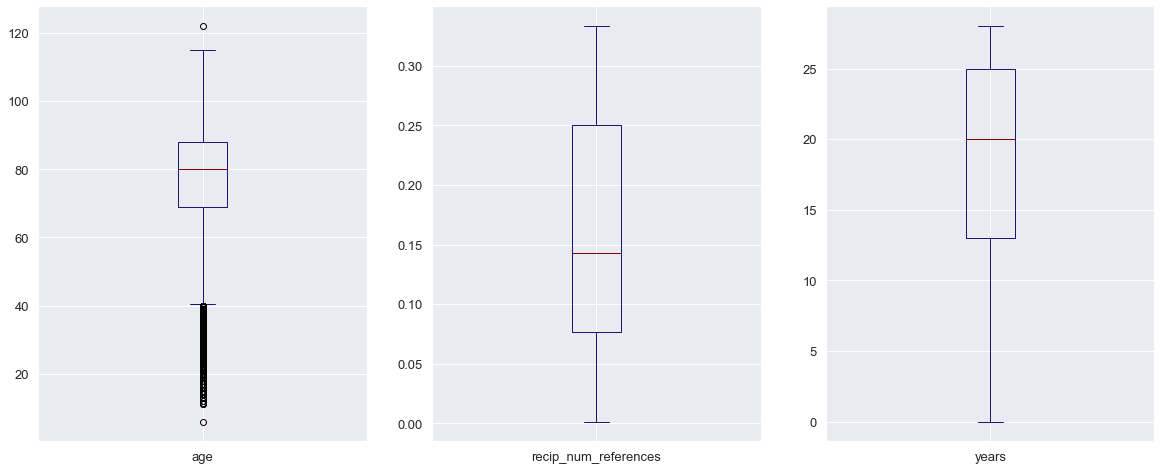

,outlier_count,percentage_outliers
age,3841,3.960
recip_num_references,0,0.000
years,0,0.000


<IPython.core.display.Javascript object>

In [15]:
# Boxplots of numerical features to view outliers
df[["age", "recip_num_references", "years"]].plot.box(
    subplots=True, figsize=(20, 8), layout=(1, 3)
)
plt.show()

# Outliers outside of IQR ends +/- 1.5 * IQR for each numerical column
outside_IQRends_pls1pt5(df[["age", "recip_num_references", "years"]])

#### Observations:
- Our numeric predictors do not have any outliers.  Recall that `recip_num_references` is already a transformation.
- The target, `age`, has at least one upper-end outlier and numerous lower-end outliers.
- In general, we would not treat the target's outliers.  However, the two most extreme values, one on either end, are worth examining more closely as they don't follow the trend of the data.

#### Examining the Most Extreme Values for Target `age`

In [16]:
df[(df["age"] > 120) | (df["age"] < 7)]

,info,link,info_parenth,age,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,recip_num_references,region,prior_region,years
5030,", 6, American child beauty queen, asphyxia by strangulation and craniocerebral trauma.",https://en.wikipedia.org/wiki/Killing_of_JonBen%C3%A9t_Ramsey,None,6.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.009,North America,N/A,2
78789,", 122 .",https://en.wikipedia.org/wiki/Sudhakar_Chaturvedi,"claimed, Indian Vedic scholar and courier Mahatma Gandhi",122.000,0.000,0.000,0.000,0.500,0.000,0.000,0.000,0.000,0.500,0.000,0.000,0.027,Asia,N/A,26


<IPython.core.display.Javascript object>

#### Observations:
- We will drop the lower end outlier as the entry is more correctly categorized solely as event_record_other.  It is unlikely the individual would have been known if not for the manner of her death.
- In contrast, we will keep the upper-end outlier, who was noteworthy in life beyond his age alone.

#### Dropping Lower-end Outlier for `age`

In [17]:
# Dropping single entry with lowest age
index = df[
    df["link"] == "https://en.wikipedia.org/wiki/Killing_of_JonBen%C3%A9t_Ramsey"
].index
df.drop(index, inplace=True)
df.reset_index(inplace=True, drop=True)

<IPython.core.display.Javascript object>

#### Visualization of Outliers after Treatment

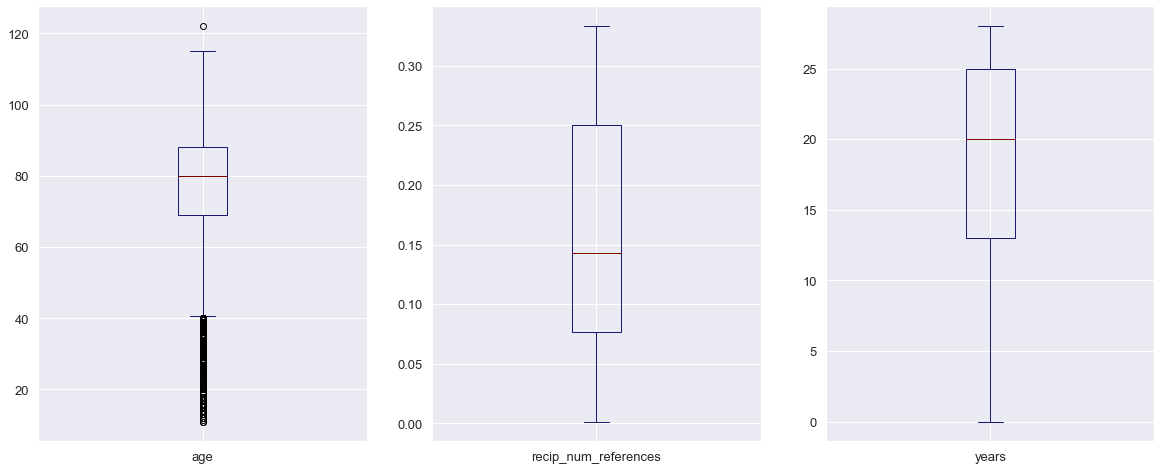

,outlier_count,percentage_outliers
age,3840,3.960
recip_num_references,0,0.000
years,0,0.000


<IPython.core.display.Javascript object>

In [18]:
# Boxplots of numerical features to view outliers
df[["age", "recip_num_references", "years"]].plot.box(
    subplots=True, figsize=(20, 8), layout=(1, 3)
)
plt.show()

# Outliers outside of IQR ends +/- 1.5 * IQR for each numerical column
outside_IQRends_pls1pt5(df[["age", "recip_num_references", "years"]])

#### Observations:
- We will now save our dataset and pick back up in a new notebook.

### Exporting Dataset to SQLite Database [wp_life_expect_clean.db]()

In [ ]:
# # Exporting dataframe

# # Saving dataset in a SQLite database
# conn = sql.connect("wp_life_expect_clean.db")
# df.to_sql("wp_life_expect_clean", conn, index=False)

In [ ]:
print('Complete')

# Chime notification when cell executes
chime.success()

# [Proceed to Data Cleaning Part ]()